# Temperature and Heat Capacity for Einstein Solids in Contact
---

Previously, you built a computational model to analyze two Einstein Solids in contact. With this model, you looked at how the ideas of thermal equilibrium and entropy can emerge from statistical combinatorics.

In this activity, you will expand your previous analysis of Einstein solids in order to extend the idea of statistical equilibirum to include temperature. You will also compare your model of the heat capacity to empirical data.

Broadly, your model should
* Iterate over energy **macrostates**; Again, imagine starting with all of the quanta in solid A and then, one-by-one, shifting individual quanta into solid B.
* Calculate the **multiplicity** and **entropy** for each macrostate (from the previous activity set)
* Use macroscopic material properties (Young's Modulus) to estimate atomic properties (metalic bond strength, energy quanta)
* Calculate thermodynamic quantities (**temperature** and **heat capacity**) derived from the multiplicity and the energy
* Extract heat capacity data from an external file (attached to this activity) and plot those data against your model predictions.

## Exercise 1: Setting up the program
---

**Run the following code**

Begin by importing the following libraries in order to manipulate arrays, use combinatorics, and plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

We want to model two Einstein solids in contact; one with 150 oscillators and one with 351, sharing 100 energy quanta between them. Remember that each atom corresponds to 3 oscillators in the Einstein solid, so block A has 50 atoms and block B has 117 atoms.

Run the following code to define fundamental constants and model parameters.

In [2]:
#Fundamental Constants
kB = 1.38e-23 #Boltzmann Constant [J/K]
hbar = 1.05e-34 #Planck Reduced Constant [J*s]
NA = 6.02e23 #Avogadro's Number [Atoms/Mole]

# Model Parameters
q_total = 100 #Total energy quanta
N_A = 150 #Number of oscillators in block A
N_B = 351 #Number of oscillators in block B

The next block of code is the basis for the previous activity "Einstein Solids in Contact." After running this, take a few minutes to confirm that it will create an array of all macrostates and calculate the multiplicities of each macrostate. Again, the basis of the algorithm is to imagine moving energy from block A to block B one quanta at a time and, for each step, calculating the multiplicity. Output some of these variables to "see" what kinds of objects they are.

In [3]:
# Multiplicity Calculations
q_A = np.array([q for q in range(q_total + 1)])
q_B = q_total - q_A
Ways_A = sp.comb(N_A + q_A - 1, q_A)
Ways_B = sp.comb(N_B + q_B - 1, q_B)
Ways_combined = Ways_A*Ways_B

Output some of these quantities to see what kinds of objects they are.

In [4]:
q_A

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [5]:
Ways_A

array([1.00000000e+00, 1.50000000e+02, 1.13250000e+04, 5.73800000e+05,
       2.19478500e+07, 6.75993780e+08, 1.74631726e+10, 3.89179276e+11,
       7.63764330e+12, 1.34083071e+14, 2.13192083e+15, 3.10097576e+16,
       4.16047581e+17, 5.18459293e+18, 6.03634748e+19, 6.59973991e+20,
       6.80598178e+21, 6.64584103e+22, 6.16586363e+23, 5.45192152e+24,
       4.60687369e+25, 3.72937394e+26, 2.89874065e+27, 2.16775388e+28,
       1.56258925e+29, 1.08756212e+30, 7.32012966e+30, 4.77164007e+31,
       3.01635819e+32, 1.85141985e+33, 1.10468051e+34, 6.41427395e+34,
       3.62807370e+35, 2.00093762e+36, 1.07697525e+37, 5.66181272e+37,
       2.90954265e+38, 1.46263495e+39, 7.19770359e+39, 3.46966224e+40,
       1.63941541e+41, 7.59729092e+41, 3.45495849e+42, 1.54267914e+43,
       6.76675168e+43, 2.91722184e+44, 1.23664839e+45, 5.15708689e+45,
       2.11655441e+46, 8.55260762e+46, 3.40393783e+47, 1.33487758e+48,
       5.15981527e+48, 1.96657110e+49, 7.39285063e+49, 2.74207551e+50,
      

**Answer the following questions:**
* Why is the iteration range ($q_\text{total} + 1$) and not just $q_\text{total}$?
* What percentage of the total oscillators are in block A?
* In (statistical) thermal equilibrium, how many energy quanta would you expect to be in block A? (i.e. what macrostate corresponds to the greatest multiplicity? Feel free to graph this).  

**Your answer here.**

The iteration range is $q_\text{total} + 1$ because we need to take into account the $q=0$ case; if we used an iteration range of $q_\text{total}$ then we would either lose the $q=0$ or $q=q_\text{total}$ case, depending on how the code is set up.

It looks like approximately 30% of the total oscillators are in block A (150/501)

In statistical equilibrium, I would expect 30% of the quanta to be in block A.

## Exercise 2: Calculating temperature
---
The statistical definition of temperature is
$$
T = \dfrac{\Delta U}{\Delta S}
$$
where this is regarded to be a ratio of finite differences. (This can be approximated as a derivative only in the limit of large systems with lots of energy quanta.)

**We would like to calculate the temperature of each block as a function of the number of energy quanta in block A.** Given the code in Exercise 1 that generateed arrays of multiplicity values for both blocks as a function of the energy quanta in block A, **write code that will do the following:**

1. Calculate an array of entropy values for each block. Don't forget that statistical entropy is defined as $S = k_\text{B}\ln W$
2. Create an array of $\Delta S$ values for each block. Take a few minutes to plan how you would do this. (*Hint: Imagine iterating through each macrostate where each iteration corresponds to one block gaining an energy quanta and the other loosing a quanta. Think about your range of iteration; how many values of $S$ do you have? How many $\Delta S$'s will you have?*)
3. Create an array of $T$ values for each block. For now, set $\left|\Delta U\right| = 1$ (a single quanta), we'll change it to units of joules later in this exercise set. Don't forget to keep track of the sign of $\Delta U$ for each block!

In [6]:
#Your code here
DeltaU = 1 #quanta

S_A = kB*np.log(Ways_A)
S_B = kB*np.log(Ways_B)
DeltaS_A = np.array([S_A[i+1] - S_A[i] for i in range(q_total)])
DeltaS_B = np.array([S_B[i+1] - S_B[i] for i in range(q_total)])
T_A =(DeltaU/DeltaS_A) #quanta/K
T_B = -(DeltaU/DeltaS_B) #quanta/K

**Create a plot of $T$ vs $q_A$ for both blocks and answer the following questions.**

Don't forget that the ``plt.plot`` function requires you to input arrays of equal length (or equal length slices of larger arrays) so pay attention to the size of your arrays. Both plots should be on the same set of axes. Include appropriate title, axes labels, etc.

* Where do the plots intersect? What is the physical significance of this point? Does this happen at the macrostate you would expect?
* Create a bar-plot (``plt.bar``) of $W_\text{combined}$ as a function of $q_A$ beneath the temperature plot (with proper titles, labels, etc.). How do these plots line up? What would you say is the connection between "macroscopic thermal equilibrium" and "statistical equilibrium?"

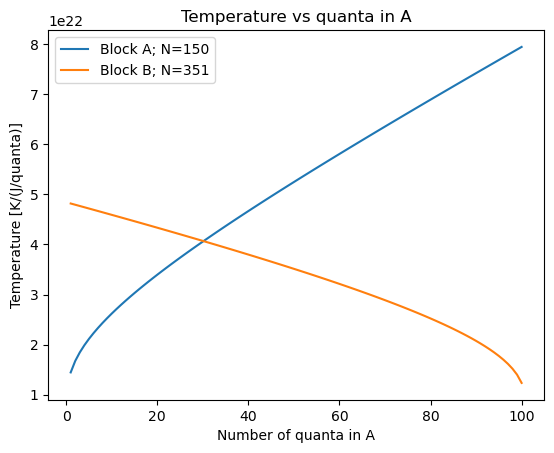

In [7]:
#Temperature Plot
plt.plot(q_A[1::], T_A, label = 'Block A; N=150') #q_A is one item longer than either temperture array, so start the plot on the 1.
plt.plot(q_A[1::], T_B, label = 'Block B; N=351')

plt.title('Temperature vs quanta in A')
plt.xlabel('Number of quanta in A')
plt.ylabel('Temperature [K/(J/quanta)]')
plt.legend()
plt.show()

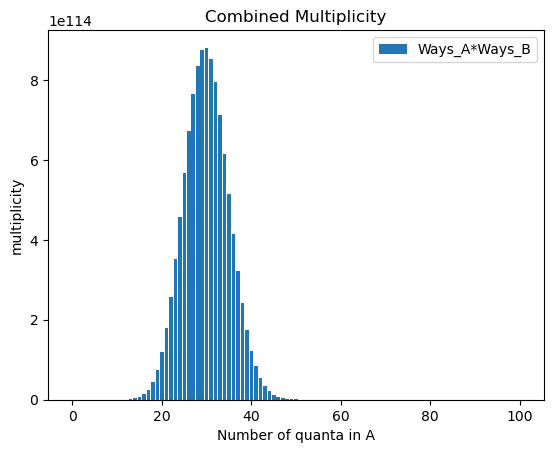

In [8]:
#Multiplicity plot
plt.bar(q_A, Ways_combined, label = 'Ways_A*Ways_B')

plt.title('Combined Multiplicity')
plt.xlabel('Number of quanta in A')
plt.ylabel('multiplicity')
plt.legend()
plt.show()

**Your answers here**

The two temperature plots intersect at the point at which $T_A = T_B$; this is the classical macroscopic definition of thermal equilibrium. Comparing this plot to the plot of $W_\text{combined}$, the point of temperature intersection occurs at the same macrostate for which $W_\text{combined}$ is maximized; this lends credence to the notion that statistical equilibrium occurs where multiplicity (and thus entropy) is maximized and that this is consistent with the idea that temperatures are equal in equilibrium.

## Exercise 3: Calculating $\Delta U$
---

The Ball-and-Spring model of a solid represents the chemical bonds between atoms in a solid as "spring-like" quantum harmonic oscillators.

https://www.glowscript.org/#/user/matterandinteractions/folder/matterandinteractions/program/12-wells-oscillator

The energy of a single quantum in the harmonic oscillator model is:
$$
\begin{align}
\Delta U &= 1\text{ quantum}\\
&= \hbar \omega\\
&= \hbar \sqrt{\dfrac{k_\text{s}}{m}}\\
&= \hbar \sqrt{\dfrac{4k_\text{s,bond}}{m}}
\end{align}
$$
$m$, in this case is the mass of a single atom and $k_\text{s,bond}$ is the effective "spring stiffness" of the chemical bond between neighboring atoms. The factor of 4 comes from the fact that in each dimension, each atom has a bond on both sides (for a factor of 2) and each spring-like bond is "cut-in-half" with the other half servicing the neighboring atom (a second factor of two)---that is, atoms in the bulk of a solid will have a larger oscillation frequency than a simple diatomic molecule would have with an equivalent bond. Each atom is comprised of three of these quantum oscillators (x-, y-, and z-directions), though we've already taken this into account by setting $N=3N_\text{atoms}$ in the multiplicity.

But how can we calculate $k_\text{s,bond}$? It turns out that the macroscopically observable **modulus of linear elasticity (Young's Modulus)** is a macroscopic manifestation of microscopic atomic bond strength and so we can use this to estimate $k_\text{s,bond}$:
$$
Y = \dfrac{\text{stress}}{\text{strain}} = \dfrac{(F/A)}{(\Delta L/L)}
$$
Rearranging to recreate the form of Hooke's law:
$$
\begin{align}
F &= \left(\dfrac{YA}{L}\right)\Delta L\\
&= k_\text{s}\Delta L
\end{align}
$$
This is a macroscopic expression, but if we imagine zooming into the stretching of a single bond, then we can write
$$
\begin{align}
F &= \left(\dfrac{YA_\text{atom}}{L_\text{bond}}\right)\Delta L_\text{bond}\\
&= k_\text{s,bond}\Delta L_\text{bond}
\end{align}
$$
So, one way to estimate the effective bond stiffness is to just multiply young's modulus by the cross-sectional area of the volume occupied by a single atom and then divide by the atomic diameter (or just simply multiply by the atomic diameter).

**Use the values given below to calculate the bond stiffness and the magnitude of an energy quantafor both lead and aluminum. Then answer the following questions**

In [29]:
## Material Properties
#Aluminum
Y_Al = 68.9e9 #N/m^2
density_Al= 2700 #kg/m^3
atomic_mass_Al = 4.48e-26 #kg/atom

#Lead
Y_Pb = 16e9 #N/m^2
density_Pb = 11340 #kg/m^3
atomic_mass_Pb = 3.44e-25 #kg/atom

#calculations
ks_Pb = Y_Pb * (atomic_mass_Pb/density_Pb)**(1/3.)
ks_Al = Y_Al * (atomic_mass_Al/density_Al)**(1/3.)

DeltaU_Pb = hbar*np.sqrt(4*ks_Pb/atomic_mass_Pb) #joules
DeltaU_Al = hbar*np.sqrt(4*ks_Al/atomic_mass_Al) #joules
print(ks_Al)

17.573461132402368


* Do these material values comport with your knowledge that lead is heavy but "soft" while aluminum is comparatively light but hard?
* In the code below, recreate your calculations of temperature (Exercise 2) to feature these new calculations of $\Delta U$. You should end up with an array of temperature values for each material.
* Does the equilibrium temperature depend on the material of the blocks? (Assume that both are the same material; You can try making one lead and one aluminum to see what happens but since these materials have different sized quanta, then the model's exchange of individual quanta would violate energy conservation.)
* For each material, plot the temperature of block A as a function of $q_A$. These should all be in the same plot. Be sure to include proper labeling, etc. (You can ignore block B for this).

**Your answers here**

Qualitatively, lead is both heavier than a similarly-sized piece of aluminum and it is softer, i.e. more malleable. According to these material parameters, lead has both a larger atomic mass and a higher density than aluminum, so yes, that does comport with my experience with lead as being heavier than aluminum. Young's modulus effectively plots the force (per area) you must exert in order to effect a stretch; Lead has a much smaller modulus than aluminum meaning that you don't have to exert as much force to effect the same percent stretch. Again, this fits with my experiences of lead and aluminum.

The equilibrium state does not depend on the size of $\Delta U$ and thus does not depend on the material of the blocks; equilibrium occurs when $q/N$ is uniform (on average) across the blocks regardless of how much energy is contained in a single quanta. The temperature of this equilibrium, however, does depend on $\Delta U$.

By the way, notice that in the macroscopic limit, the equilibrium temperature only depends on the relative number of oscillators in each block and not on the block material (so long as both A and B are the same material, that is). We can see this from the calorimetry equation:
$$
\begin{align}
(M_Ac\Delta T)_\text{block A} = -(M_Bc\Delta T)_\text{block B}\\
(m N_Ac\Delta T)_\text{block A} = -(m N_Bc\Delta T)_\text{block B}\\
(N_A\Delta T)_\text{block A} = -(N_B\Delta T)_\text{block B}\\
T_\text{eq} = \dfrac{T_{0A}N_A + T_{0B}N_B}{N_A + N_B}
\end{align}
$$

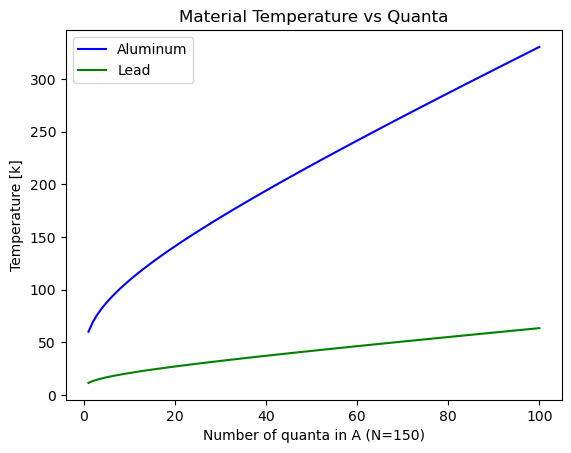

In [10]:
#Your code here

T_Al = (DeltaU_Al/DeltaS_A)
T_Pb = (DeltaU_Pb/DeltaS_A)

#Your plots here

plt.plot(q_A[1::], T_Al, 'b', label = 'Aluminum')
plt.plot(q_A[1::], T_Pb, 'g', label = 'Lead')

plt.title('Material Temperature vs Quanta')
plt.xlabel('Number of quanta in A (N=150)')
plt.ylabel('Temperature [k]')
plt.legend()
plt.show()

## Exercise 4: Emperical Heat Capacity Data
---

In the next few parts, we'll model the heat capacity of both an aluminum block and a lead block and compare these models to real data. From here on out, **focus just on block A**, which we will take to be alternatively aluminum and lead.

**Download the csv file of heat capacity data posted with this workbook and save this file in the same folder as this workbook.**

If you cannot access this csv file, a copy is publicly available on GitHub
https://github.com/QuantumBrandon/Statistical-Mechanics-Public/blob/master/SpecificHeatData.csv

You can download it manually or you can run the following code to download the csv file from GitHub and save it in the same folder as your Jupyter Notebook.

In [ ]:
#Only run if you've not already downloaded the heat capacity csv
import os
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/QuantumBrandon/Statistical-Mechanics-Public/master/"
SPECIFICHEAT_URL = DOWNLOAD_ROOT + "SpecificHeatData.csv"

def fetch_heatcapacity_data(url = SPECIFICHEAT_URL):
    if not os.path.isfile("SpecificHeatData.csv"):
        urllib.request.urlretrieve(url, "SpecificHeatData.csv")
fetch_heatcapacity_data()

Next, execute the following lines of code. (Note that these heat capacities are in units of joules per kelvin per mole).

In [11]:
import pandas as pd
C_data = pd.read_csv('SpecificHeatData.csv', delimiter = ',')
C_data

,Temperature,C_Al,C_Pb,C_Si,C_Di,C_NaCl
0,20,0.23,11.01,0.100,0.00137,1.30
1,40,2.09,19.57,1.299,0.01220,10.10
2,60,5.77,22.43,3.488,0.04330,21.10
3,80,9.65,23.69,5.160,0.10700,29.29
4,100,13.04,24.40,7.160,0.24400,35.20
5,150,18.52,25.27,11.600,1.01000,43.38
6,200,21.58,25.87,15.300,2.34000,46.90
7,250,23.35,26.36,17.700,4.14000,48.78
8,300,24.32,26.82,19.400,6.19000,NaN
9,400,25.61,27.45,21.900,10.20000,NaN


In [12]:
C_data_abr = C_data[['Temperature','C_Al', 'C_Pb']] #abr means abridged
C_data_abr

,Temperature,C_Al,C_Pb
0,20,0.23,11.01
1,40,2.09,19.57
2,60,5.77,22.43
3,80,9.65,23.69
4,100,13.04,24.40
5,150,18.52,25.27
6,200,21.58,25.87
7,250,23.35,26.36
8,300,24.32,26.82
9,400,25.61,27.45


In [13]:
C_data_array = np.array(C_data_abr)
C_data_array

array([[2.000e+01, 2.300e-01, 1.101e+01],
       [4.000e+01, 2.090e+00, 1.957e+01],
       [6.000e+01, 5.770e+00, 2.243e+01],
       [8.000e+01, 9.650e+00, 2.369e+01],
       [1.000e+02, 1.304e+01, 2.440e+01],
       [1.500e+02, 1.852e+01, 2.527e+01],
       [2.000e+02, 2.158e+01, 2.587e+01],
       [2.500e+02, 2.335e+01, 2.636e+01],
       [3.000e+02, 2.432e+01, 2.682e+01],
       [4.000e+02, 2.561e+01, 2.745e+01]])

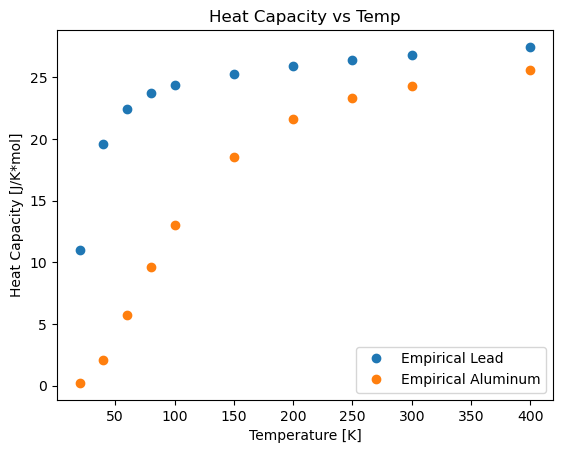

In [15]:
C_Lead_Plot = plt.plot(C_data_array[:,0], C_data_array[:,2],'o', label = 'Empirical Lead')
C_Aluminum_Plot = plt.plot(C_data_array[:,0], C_data_array[:,1],'o', label = 'Empirical Aluminum')

#ax = plt.gca()
#C_data_abr.plot(kind = 'scatter', x = 'Temperature', y = 'C_Al', label='Aluminum', ax=ax)
#C_data_abr.plot(kind = 'scatter', x = 'Temperature', y = 'C_Pb', label='Lead', color='orange', ax=ax)

plt.title('Heat Capacity vs Temp')
plt.xlabel('Temperature [K]')
plt.ylabel('Heat Capacity [J/K*mol]')
plt.legend()
plt.show()

## Exercise 5: Numerical Prediction of C
---

The definition of heat capacity is
$$
C = \dfrac{\Delta U}{\Delta T}
$$
where, as with temperature, this is taken to be a ratio of finite differences.

**Write code to calculate $C(T)$ for both Aluminum and Lead and plot these predictions against the empirical data.**

Both plots should be on the same set of axes. Include title, axes labels, etc. As in your calculation of $T$, don't forget to keep track of your iteration range and that the ``plot`` function requires you to input arrays of equal length (or equal length slices of larger arrays).
Some things to keep in mind:
* You only need to consider one block gaining energy quanta, but repeat this for each material.
* Your numerical predictions will have dimensions of heat capacity per ($N_\text{oscillators}/3$) atoms but the empirical data has dimensions of heat capacity per mole; make sure that the dimensions of your model are consistent with the empirical data before plotting. (If you get lost in the unit conversion, pay attention to the y-axis).
* Your "bond spring stiffness" is an estimation based on the material average; feel free to "tune" your prediction in order to better fit the empirical data.
* If you would like to test this model against other materials, csv files attached to this set contain data for diamond and silicon.

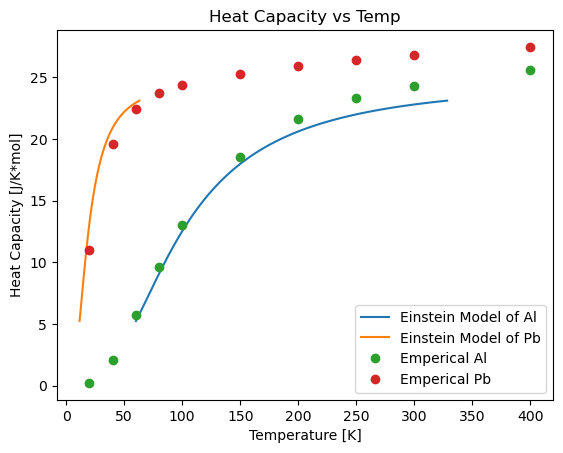

In [16]:
#Your code here

DeltaT_Al = np.array([T_Al[i+1] - T_Al[i] for i in range(q_total-1)])
DeltaT_Pb = np.array([T_Pb[i+1] - T_Pb[i] for i in range(q_total-1)])

C_Al = (DeltaU_Al/DeltaT_Al)*NA/(N_A/3)
C_Pb = (DeltaU_Pb/DeltaT_Pb)*NA/(N_A/3)

C_Model_Al = plt.plot(T_Al[0:-1], C_Al, label = 'Einstein Model of Al')
C_Model_Pb = plt.plot(T_Pb[0:-1], C_Pb, label = 'Einstein Model of Pb')


# This code plots the emperical data
C_data_Al = plt.plot(C_data_array[:,0], C_data_array[:,1], 'o', label = 'Emperical Al')
C_data_Pb = plt.plot(C_data_array[:,0], C_data_array[:,2], 'o', label = 'Emperical Pb')

plt.title('Heat Capacity vs Temp')
plt.xlabel('Temperature [K]')
plt.ylabel('Heat Capacity [J/K*mol]')
plt.legend()
plt.show()

**Answer the following questions:**

* How well does the numerical model of the Einstein solid reproduce the empirical data?
* How does this compare to the classical prediction ($C = 3N_\text{A}k_\text{B}$ for all monatomic solids, independent of temperature)?
* What does this imply about the validity of the Einstein model of a solid? What are some aspects of the empirical data that don't seem to be captured by your model? What are some aspects of the physical situation that your model doesn't capture (at least as far as heat capacity goes)?

**Your answer goes here.**

This model actually follows the data pretty well! it drops toward $C=0$ as $T\to0$ and it levels off at around $3N_Ak_B$ as T grows large for both solids. This implies that the Einstein model accurately captures some features of nature.  That being said, this model does seem to diverge from the data at both high and low temperatures, which suggests that there are aspects of nature that are not captured (or not properly captured) by this model. in truth, we should expect atoms would resonate with one another and that long-range vibrations would be susceptible to being "frozen out" at low temperatures. The Einstein model also doesn't say anything about other vibrations that might contribute to the heat capacity including electronic vibrations and magnetic dipole oscillations.

## Exercise 6: Analytic Predictions of C
---

You may have noticed that the numerical plot doesn't extend down close to zero; this is partly a limitation of keeping our values for $N$ and $q$ small enough that the combinatoric functions don't overload the processor. As an alternative, we can turn to the analytic solution for heat capacity of the Einstein solid:
$$
C(T) = 3N_\text{A}k_\text{B}\dfrac{e^{\hbar\omega/k_\text{B}T}}{\left(e^{\hbar\omega/k_\text{B}T} - 1\right)^2}\left(\dfrac{\hbar\omega}{k_\text{B}T}\right)^2
$$

**Write code that does the following:**

1. Write a function that takes as input $\omega$ and $T$ and outputs a value for the heat capacity.
2. Create an array of temperature values between 1 and 400 and input these into this heat capacity function along with the oscillation frequency for aluminum.
3. Plot the analytic solution against both the empirical data for aluminum and the numerical model for aluminum. This plot should include appropriate labels, etc.  

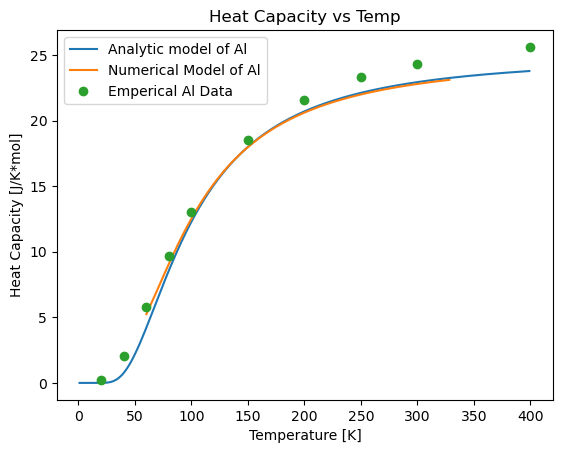

In [17]:
#Your code here

def HeatCapacity(T, omega):
    a = (hbar*omega)/(kB*T)
    b = np.exp(a)
    return 3*NA*kB*b*(a**2)/(b-1)**2

T = np.arange(1,400)

plt.plot(T, HeatCapacity(T,DeltaU_Al/hbar), label = 'Analytic model of Al')
plt.plot(T_Al[0:-1], C_Al, label = 'Numerical Model of Al')
C_data_Al = plt.plot(C_data_array[:,0], C_data_array[:,1], 'o', label = 'Emperical Al Data')

plt.title('Heat Capacity vs Temp')
plt.xlabel('Temperature [K]')
plt.ylabel('Heat Capacity [J/K*mol]')
plt.legend()
plt.show()

**Comment on these**

what are some aspects of the emperical data thath don't seem to be captures by your model?

## Bonus Code!
---

#### Alternate numerical algorithm for calculating C:
Here is an alternate algorithm for calculating the heat capacity with a more explicit iteration. Since each value of C is a delta of deltas, the algorithm must calculate 3 values of S in ordert to generate two values of Delta S, and finally one value of C. I will focus just on Al for this.

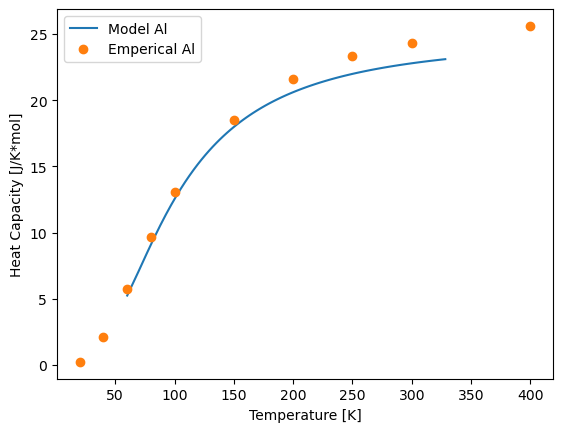

In [18]:
# Alternate numerical algorithm for calculating C. Since each value of C is a delta of deltas,
# the algorithm must calculate 3 values of S in ordert to generate two values of
# Delta S, and finally one value of C. I will focus just on Al for this.

C = []
T = []

for q in range(q_total - 1):
    S1 = kB*np.log(sp.comb(N_A + q -1, q))
    S2 = kB*np.log(sp.comb(N_A + (q+1) -1, q+1))
    S3 = kB*np.log(sp.comb(N_A + (q+2) -1, q+2))

    DeltaS_12 = S2 - S1
    DeltaS_23 = S3 - S2

    T12 = DeltaU_Al/DeltaS_12
    T23 = DeltaU_Al/DeltaS_23

    DeltaT = T23 - T12

    C.append((DeltaU_Al/DeltaT)*(NA/50))
    T.append(T12)

Al_model = plt.plot(T,C, label='Model Al')
C_data_Al = plt.plot(C_data_array[:,0], C_data_array[:,1], 'o', label = 'Emperical Al')
plt.xlabel('Temperature [K]')
plt.ylabel('Heat Capacity [J/K*mol]')
plt.legend()
plt.show()

**Large q or N**

You may have noticed that the numerical plot doesn't extend down close to zero; this is partly a limitation of keeping our values for $N$ and $q$ small enough that the combinatoric functions don't overload the processor. If you would like to use the numerical algorithm with larger $q$ and/or $N$, DO NOT use use the combinatoric functions for $q+N$ much larger than a few hundred (similarly, don't calculate $q^q$ or $N^N$ for even medium-sized values of $q$ or $N$.) Instead, calculate the entropy directly using the stirling approximation:

$$
S\approx k_\text{B}\left[(q+N)\ln\left(q+N\right) - q\ln\left(q\right) - N\ln\left(N\right)\right]
$$



Although $0\ln(0) = 0$, $\ln(0) = -\infty$ and so the computer might output NaN; to avoid this, simply start the calculation at q = 1.

In [19]:
# Alternate calculations for large q,N

DeltaU = 1
q_A = np.array([q for q in range(1,q_total + 2)])
S_A = kB*((q_A + N_A)*np.log(q_A+N_A) - q_A*np.log(q_A) - N_A*np.log(N_A))
DeltaS_A = np.array([S_A[i+1] - S_A[i] for i in range(q_total)])
T_A =(DeltaU/DeltaS_A)

#### Even more heat capacity data
In addition to aluminum and lead, the SpecificHeatData.csv data file contains specific heat capacity measurements at various temperatures for silicon, diamond, and salt (NaCl). We can model and plot these alongside the lead and aluminum data (as well as any other materials that you might want to add into that file) however adding additional material data (density, Young's modulus, etc.) into the code as written starts to become klunky. To alleviate this, I have included a second csv file with material properties of five materials (Al, Pb, Si, Di, NaCl); The following code makes use of the Pandas library to extract the csv data into a DataFrame which streamlines data analysis. In particular, this code preserves readable variable names (as opposed to something abstract like "material_data[1,2]"). This code is also set up so that additional material data can be added to this csv file without having to alter the code. As above, I am including some code to download this from my GitHub account.

In [20]:
#Download the MaterialProperties csv from GitHub. Only run if you've not already downloaded the properties csv
import os
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/QuantumBrandon/Statistical-Mechanics-Public/master/"
MATERIAL_URL = DOWNLOAD_ROOT + "MaterialProperties.csv"

def fetch_material_data(url = MATERIAL_URL):
    if not os.path.isfile("MaterialProperties.csv"):
        urllib.request.urlretrieve(url, "MaterialProperties.csv")
fetch_material_data()

In [21]:
import pandas as pd
from pandas import Series

material_data = pd.read_csv('MaterialProperties.csv', delimiter = ',')

# Some minor data cleaning needs to be done on the csv data as is prior to any analysis.
# This first block of code sets up any cleaning algorithms that need to be performed on the extracted data.

def SetUpIndex(dataset):
    '''
    This function replaces the original numbered index in a Pandas Data Frame with the materal name
    contained in the first column. This then deletes that column.
    '''
    dataset.index = dataset.Material
    del material_data['Material']

#cleaninglist is a list of all functions that will need to be applied to a csv before data
#analysis can occur. The CleanData function will run each of these functions.

cleaninglist = [SetUpIndex]

def CleanData(dataset, cleaning_todo = cleaninglist):
    '''
    This function will apply all functions listed in the 'cleaning to do list' to a csv file
    input as 'dataset'.
    The functions in 'cleaninglist' can be any function that needs to be applied to a
    csv file prior to its use in analysis.

    '''
    for function in cleaning_todo:
        function(dataset)

CleanData(material_data)

material_data

,Young’s Modulus [N/m^2],Density [kg/m^3],Atomic Mass [kg/atom]
Material,,,
Aluminum,6.900000e+10,2700,4.480000e-26
Lead,1.600000e+10,11340,3.440000e-25
Silicon,1.700000e+11,2530,4.660000e-26
Diamond,1.220000e+12,3530,1.990000e-26


In [23]:
# Now we can calulate the effective spring stiffness and energy quanta of these materials.

def ExtendedProperties(material):
    '''
    This function takes as input Young's modulus, atomic density, and atomic mass
    and calculates the effective bond stiffness and the approximate size of an energy
    quanta.

    This function is written to operate on the DataFrame created from the csv that is
    paired with this exercise and thus is not general.
    '''

    #these variables are easier to write into equations
    Y = material['Young’s Modulus [N/m^2]']
    density = material['Density [kg/m^3]']
    mass = material['Atomic Mass [kg/atom]']

    #calculate the effective bond stiffness and the size of an energy quanta
    ks = Y*(mass/density)**(1/3)
    Delta_U = hbar*np.sqrt(4*ks/mass)


    return Series([ks, Delta_U], index=['Effective Spring Stiffness [N/kg]', 'Delta U [J]'])

material_properties = pd.merge(material_data, material_data.apply(ExtendedProperties, axis=1),on = 'Material').transpose()

material_properties


Material,Aluminum,Lead,Silicon,Diamond
Young’s Modulus [N/m^2],6.900000e+10,1.600000e+10,1.700000e+11,1.220000e+12
Density [kg/m^3],2.700000e+03,1.134000e+04,2.530000e+03,3.530000e+03
Atomic Mass [kg/atom],4.480000e-26,3.440000e-25,4.660000e-26,1.990000e-26
Effective Spring Stiffness [N/kg],1.759897e+01,4.990014e+00,4.489563e+01,2.171297e+02
Delta U [J],4.162209e-21,7.998176e-22,6.518210e-21,2.193575e-20


Try executing the following lines of code:

In [24]:
material_properties['Silicon']

Young’s Modulus [N/m^2]              1.700000e+11
Density [kg/m^3]                     2.530000e+03
Atomic Mass [kg/atom]                4.660000e-26
Effective Spring Stiffness [N/kg]    4.489563e+01
Delta U [J]                          6.518210e-21
Name: Silicon, dtype: float64

In [25]:
material_properties['Aluminum']['Atomic Mass [kg/atom]']

4.48e-26

In [26]:
Material_List = ['Aluminum', 'Silicon']
for material in Material_List:
    print(material_properties[material]['Density [kg/m^3]'])

2700.0
2530.0


Everything is set up to plot both the empirical data and the theoretical models. Write into the following two lists which materials you would like to include in the plot

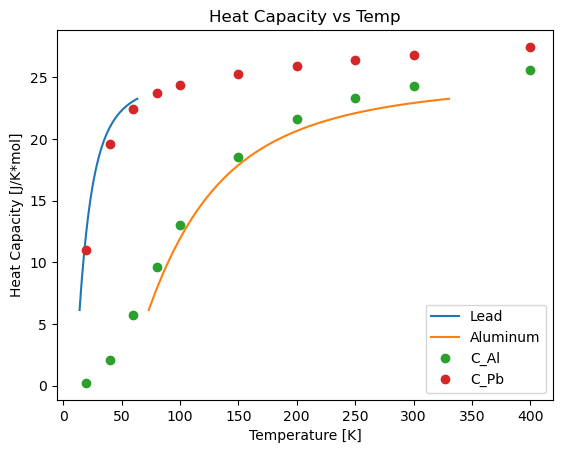

In [27]:
#Which models do you want to plot?
model_list = ['Lead', 'Aluminum']#['Aluminum', 'Silicon', 'Lead', 'Diamond']

#Which emperical data set do you want to plot?
empirical_list = ['C_Al', 'C_Pb']#['C_Al', 'C_Si', 'C_Pb', 'C_Di', 'C_NaCl']


def Delta(array):
    '''
    Given an input list, return an array that calculates differences between sequential values in the input list.
    Output array has a length of (len(input) - 1)
    '''
    length = len(array) - 1 #the array of deltas will be shorter than the input array by 1
    DeltaArray = np.array([array[i+1] - array[i] for i in range(length)])
    return DeltaArray

for material in model_list:

    #T = DeltaU/DeltaS
    DeltaS = Delta(S_A) #S_A is defined in the original code, above.
    T = material_properties[material]['Delta U [J]']/DeltaS

    #C = DeltaU/DeltaT
    DeltaT = Delta(T)
    C = material_properties[material]['Delta U [J]']/DeltaT

    plt.plot(T[1:],C*(NA/50), label = material) #Note that C is shorter than T by 1; "T[1:]" skips the 0th value.

C_data = pd.read_csv('SpecificHeatData.csv', delimiter = ',')
for material in empirical_list:

    T = C_data['Temperature']
    C = C_data[material]
    plt.plot(T,C, 'o', label = material)

plt.title('Heat Capacity vs Temp')
plt.xlabel('Temperature [K]')
plt.ylabel('Heat Capacity [J/K*mol]')
plt.legend()
plt.show()


And in case you just want to set these parameters directly in the code.

In [28]:
#Silicon ((1,1,1) crystal)
Y_Si = 168.9e9 ##N/m^2
density_Si = 2530 #kg/m^3
atomic_mass_Si = 4.66e-26 #kg/atom

#Diamond
Y_Di = 1220e9 ##N/m^2
density_Di = 3530 #kg/m^3
atomic_mass_Di = 1.99e-26 #kg/atom. This is for a carbon atom.